In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

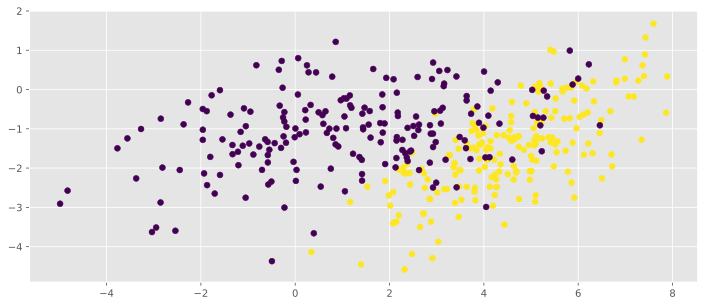

In [153]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [154]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.penalty = penalty
        self.loss_history = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        self.loss_history = []
        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)
        
        self.theta = np.zeros(X_bias.shape[1])
        m = len(X_bias)
        if(self.penalty == 'l0'):
            for epoch in range(self.max_epoch):
                for i in range(m):
                    random_index = np.random.randint(m)
                    xi = X_bias[random_index:random_index+1]
                    yi = y[random_index:random_index+1]
                
                    z = np.dot(xi, self.theta)
                    h = self.sigmoid(z)
                    gradient = np.dot(xi.T, (h-yi))
                    self.theta -= self.alpha * gradient
                
                self.loss_history.append(self.loss(self.sigmoid(np.dot(X_bias, self.theta)), y))
                
        if(self.penalty == 'l1'):
            for epoch in range(self.max_epoch):
                for i in range(m):
                    random_index = np.random.randint(m)
                    xi = X_bias[random_index:random_index+1]
                    yi = y[random_index:random_index+1]
                    z = np.dot(xi, self.theta)
                    h = self.sigmoid(z)
                    gradient = np.dot(xi.T, (h-yi))  + self.C*np.sign(self.theta)/m
                    self.theta -= self.alpha * gradient
                self.loss_history.append(self.loss(self.sigmoid(np.dot(X_bias, self.theta)), y))
                
        if(self.penalty == 'l2'):
            for epoch in range(self.max_epoch):
                for i in range(m):
                    random_index = np.random.randint(m)
                    xi = X_bias[random_index:random_index+1]
                    yi = y[random_index:random_index+1]
                    z = np.dot(xi, self.theta)
                    h = self.sigmoid(z)
                    gradient = np.dot(xi.T, (h-yi))  + self.C*2*self.theta/m
                    self.theta -= self.alpha * gradient
                self.loss_history.append(self.loss(self.sigmoid(np.dot(X_bias, self.theta)), y))
                
        return self

        
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)
        treshold = 0.5
        
        y_hat_proba = self.sigmoid(np.dot(X_bias, self.theta))
        
        y_hat = (y_hat_proba>= treshold)*1
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        bias = np.ones(shape=(X.shape[0],1))
        X_bias = np.append(bias, X, axis=1)

        y_hat_proba = self.sigmoid(np.dot(X_bias, self.theta))
        return y_hat_proba

#  Без регуляризации

$$ Q(\theta, x) = - \frac{1}{m}\sum_{i=1}^{n}[y_i \log (\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)]$$

## 1

$$ \frac{\partial Q(\Theta, x)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n}(\sigma(\theta^T\cdot x^i) - y_i)x_{j}^{i}$$

$$ \theta := \theta - {C}\frac{\partial L}{\partial \theta}$$

In [175]:
logreg_l0 = MySGDClassifier(alpha=0.01, max_epoch=50, penalty='l0')
logreg_l0.fit(X,y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=50, penalty='l0')

In [160]:
logreg_l0.theta

array([-9.23323833,  2.17825671, -2.37703814])

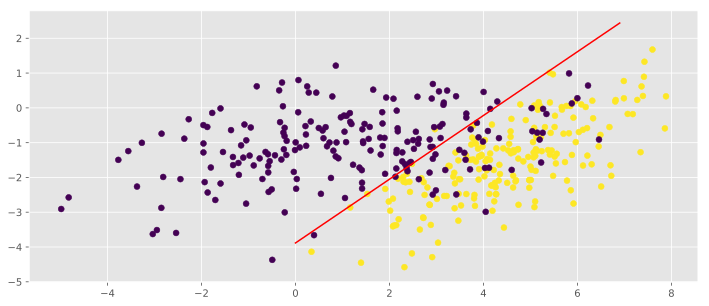

In [161]:
x_1 = np.arange(0, 7, 0.1)
x_2 = -((logreg_l0.theta[0] + logreg_l0.theta[1]*x_1)/logreg_l0.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

# L1 регуляризация








$$ Q(\theta, x) = - \frac{1}{m}\sum_{i=1}^{n}[y_i \log (\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)] + {C} \sum_{i=1}^{n} |\theta_i| $$

## 2

$$ \frac{\partial Q(\Theta, x)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n}(\sigma(\theta^T\cdot x^i) - y_i)x_{j}^{i} + {C} sign(\theta_i)$$

$$ \theta := \theta - \alpha\frac{\partial L}{\partial \theta}$$

In [176]:
logreg_l1 = MySGDClassifier(alpha=0.01, max_epoch=500, penalty='l1')
logreg_l1.fit(X,y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=500, penalty='l1')

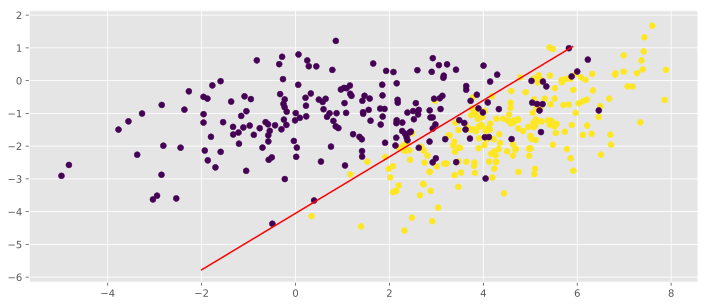

In [177]:
x_1 = np.arange(-2, 6, 0.1)
x_2 = -((logreg_l1.theta[0] + logreg_l1.theta[1]*x_1)/logreg_l1.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

# L2 регуляризация







$$ Q(\theta, x) = - \frac{1}{m}\sum_{i=1}^{n}[y_i \log (\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)] + \alpha \sum_{i=1}^{n} \theta_i^2 $$

## 1

$$ \frac{\partial Q(\Theta, x)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n}(\sigma(\theta^T\cdot x^i) - y_i)x_{j}^{i} + {2}{C} \theta_i$$

$$ \theta := \theta - \alpha\frac{\partial L}{\partial \theta}$$

In [178]:
logreg_l2 = MySGDClassifier(alpha=0.01, max_epoch=500, penalty='l2')
logreg_l2.fit(X,y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=500, penalty='l2')

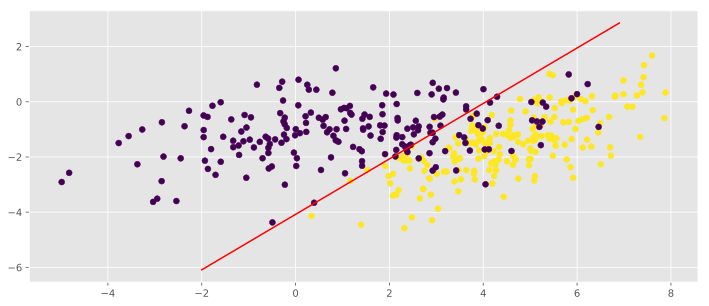

In [179]:
x_1 = np.arange(-2, 7, 0.1)
x_2 = -((logreg_l2.theta[0] + logreg_l2.theta[1]*x_1)/logreg_l2.theta[2])

plt.plot(x_1, x_2, c='red', label='descision boundary naive')
plt.scatter(X[:,0], X[:,1], c=y)

# Анализ сходимости

## Без регуляризации

In [180]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 0.3]

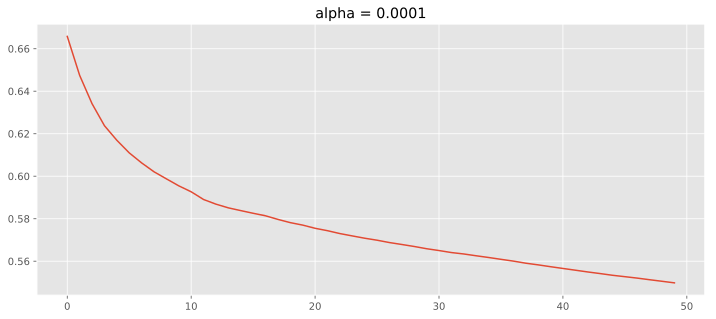

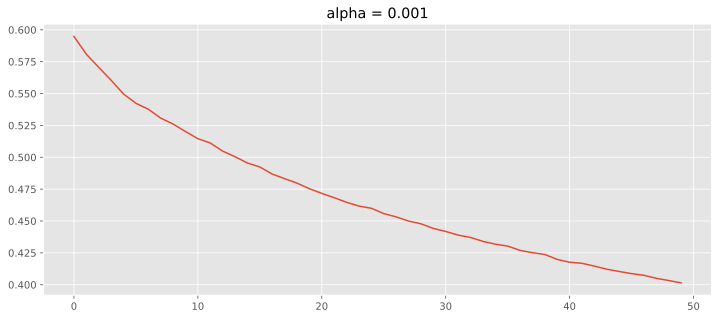

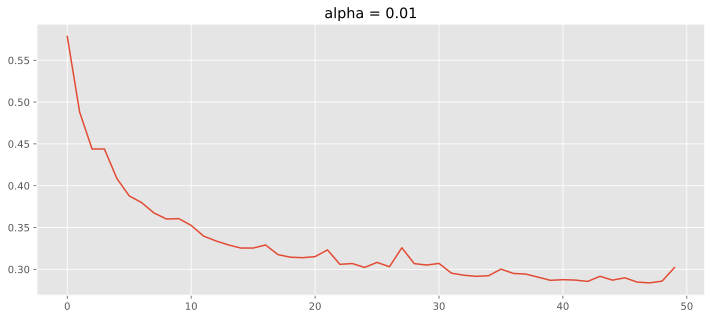

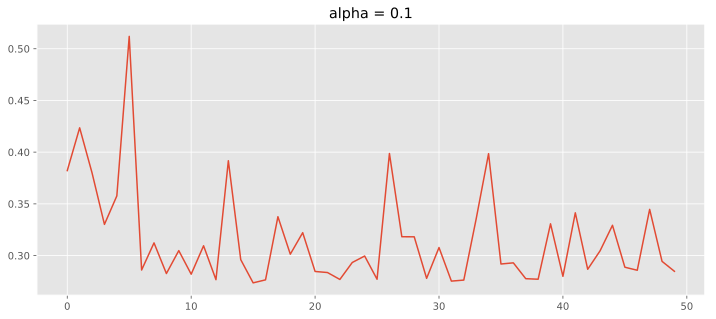

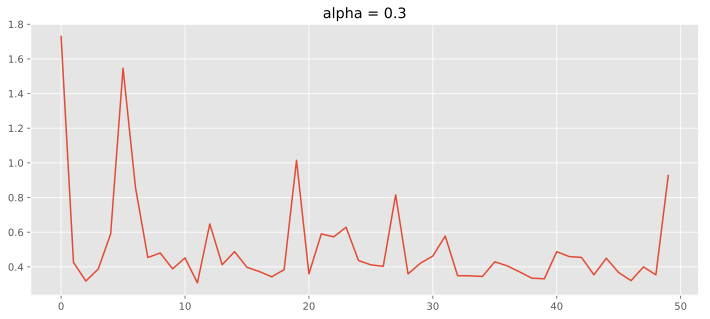

In [181]:

for i in range(len(alpha_list)):
    plt.figure(i)
    logreg_l0 = MySGDClassifier(alpha=alpha_list[i], max_epoch=50, penalty='l0')
    logreg_l0.fit(X,y)
    plt.plot(logreg_l0.loss_history)
    plt.title("alpha = " + str(alpha_list[i]))




# L1 регуляризация

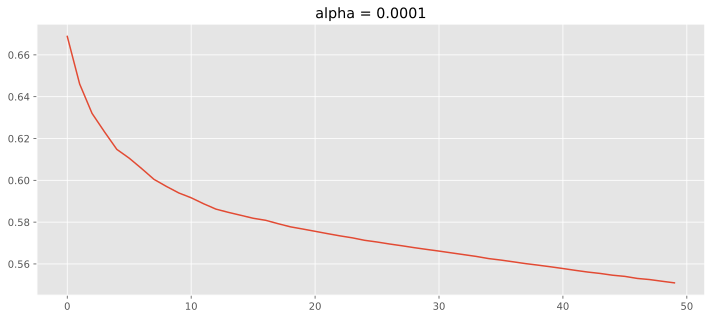

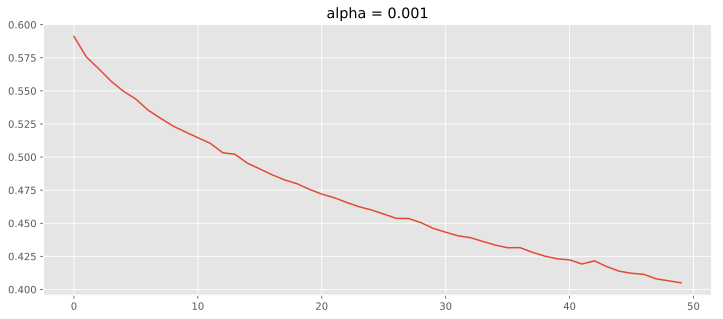

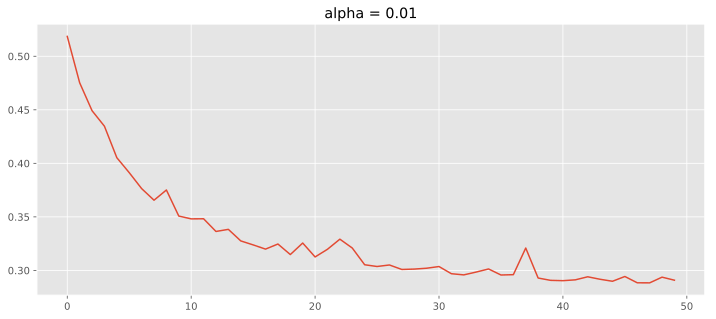

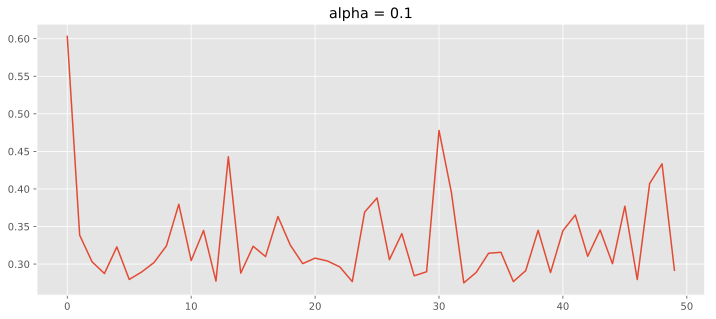

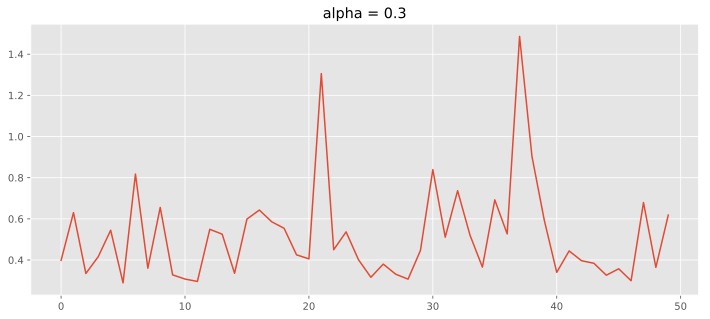

In [182]:

for i in range(len(alpha_list)):
    plt.figure(i)
    logreg_l1 = MySGDClassifier(alpha=alpha_list[i], max_epoch=50, penalty='l1')
    logreg_l1.fit(X,y)
    plt.plot(logreg_l1.loss_history)
    plt.title("alpha = " + str(alpha_list[i]))




## L2 регуляризация

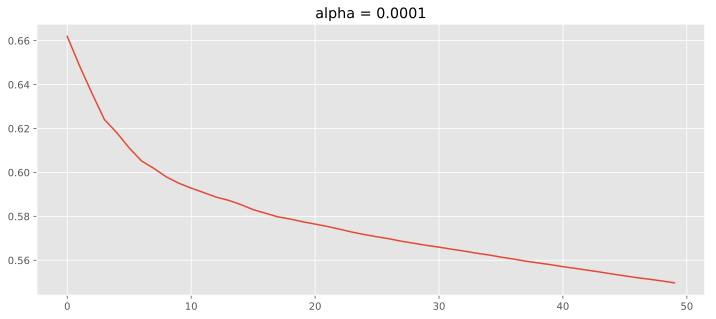

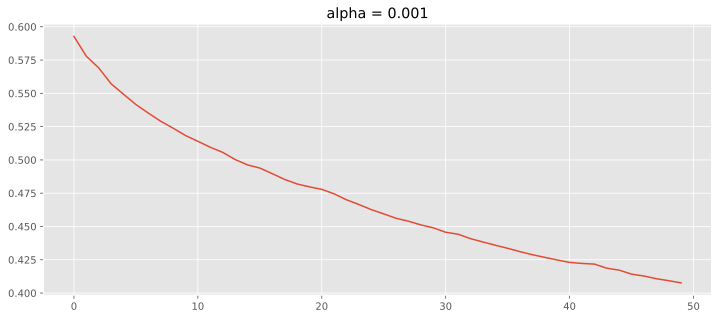

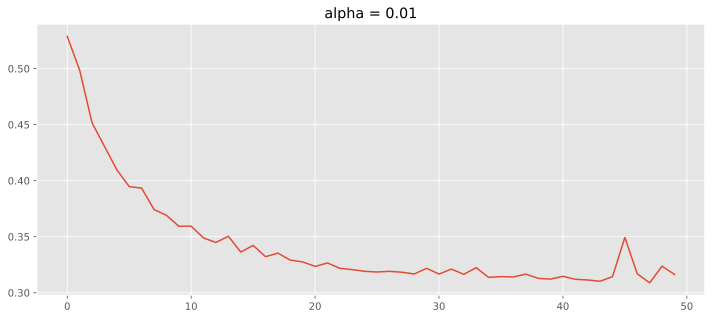

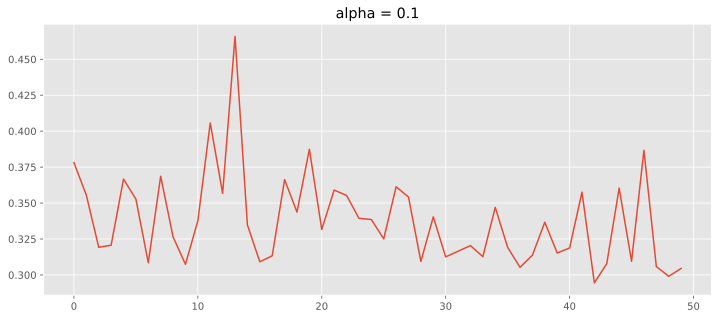

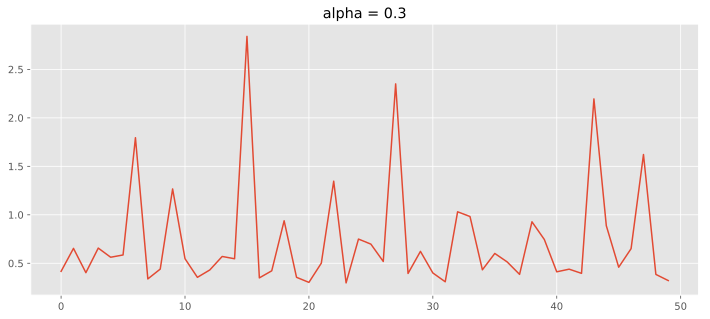

In [183]:

for i in range(len(alpha_list)):
    plt.figure(i)
    logreg_l2 = MySGDClassifier(alpha=alpha_list[i], max_epoch=50, penalty='l2')
    logreg_l2.fit(X,y)
    plt.plot(logreg_l2.loss_history)
    plt.title("alpha = " + str(alpha_list[i]))


